# **Week 6 Task :-**

# **Summarize Segment-wise Insights and Possible Drivers**

In [2]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Loading Dataset
df = pd.read_csv('Indian_Kids_Screen_Time_Cleaned.csv')

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.labelsize'] = 12

In [7]:
# Creating pivot table for average screen time by Age Band and Primary Device
avg_screen_time_age_device = pd.pivot_table(
    df,
    values='Avg_Daily_Screen_Time_hr',
    index='Age_Band',
    columns='Primary_Device',
    aggfunc='mean'
).round(2)

print("Average Screen Time (Hours/Day) by Age Group and Device:")
display(avg_screen_time_age_device)

Average Screen Time (Hours/Day) by Age Group and Device:


Primary_Device,Laptop,Smartphone,TV,Tablet
Age_Band,,,,
Child,NaN,3.92,3.93,3.92
Pre-Teen,4.42,4.56,4.55,4.44
Teenager,4.50,4.51,4.54,4.53


### Age Band & Primary Device Insights

*   **Screen time generally increases with age.** Teenagers and Pre-Teens have higher average screen times compared to younger children.
*   Possible drivers: Increased academic demands (online research, assignments), social media usage, or more access to personal devices as they get older.
*   **Smartphones are the most frequently used primary device**, followed by TV, Laptop, and Tablet.
*   While smartphone usage is highest overall, average screen time across all primary devices is relatively close, especially for Pre-Teens and Teenagers.
*   The average screen time for children using Laptops appears to be lower, which could be due to less individual access or different usage patterns at that age.

In [15]:
# Average screen time by Gender
avg_screen_time_gender = df.groupby('Gender')['Avg_Daily_Screen_Time_hr'].mean().round(2).reset_index()

print("\nAverage Screen Time (Hours/Day) by Gender:")
display(avg_screen_time_gender)


Average Screen Time (Hours/Day) by Gender:


,Gender,Avg_Daily_Screen_Time_hr
0,Female,4.33
1,Male,4.38


### Gender Insights

*   There is a **slight difference in average screen time between genders**, with males having a slightly higher average than females. However, this difference appears minimal based on the current analysis.
*   Possible drivers: Further investigation could explore if there are differences in *how* each gender spends their screen time (e.g., gaming vs. social media).

In [9]:
# Average screen time by Location
avg_screen_time_location = df.groupby('Urban_or_Rural')['Avg_Daily_Screen_Time_hr'].mean().round(2).reset_index()

print("\nAverage Screen Time (Hours/Day) by Location:")
display(avg_screen_time_location)


Average Screen Time (Hours/Day) by Location:


,Urban_or_Rural,Avg_Daily_Screen_Time_hr
0,Rural,4.37
1,Urban,4.34


### Location (Urban vs. Rural) Insights

*   Average screen time is **very similar between urban and rural areas**.
*   Possible drivers: Access to devices and screen time habits are relatively uniform across these locations in the dataset.

# **Visuals :-**

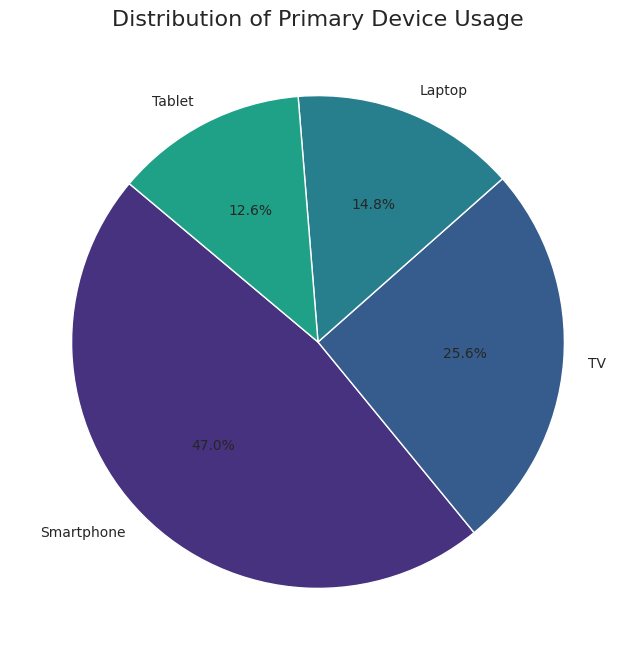

In [10]:
# Visual 1: Pie Chart for Primary Device Usage
plt.figure(figsize=(8, 8))
device_distribution = df['Primary_Device'].value_counts()
plt.pie(device_distribution, labels=device_distribution.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis'))
plt.title('Distribution of Primary Device Usage', fontsize=16)
plt.ylabel('')
plt.show()

### Insights from Visual 1 (Pie Chart: Distribution of Primary Device Usage)

*   The pie chart clearly shows that **Smartphones are the most dominant primary device** among Indian kids, accounting for the largest proportion of usage.
*   **TVs are the second most used primary device**, followed by Laptops and Tablets.
*   This distribution highlights the prevalence of mobile devices and traditional media (TV) in the screen time habits of this demographic.

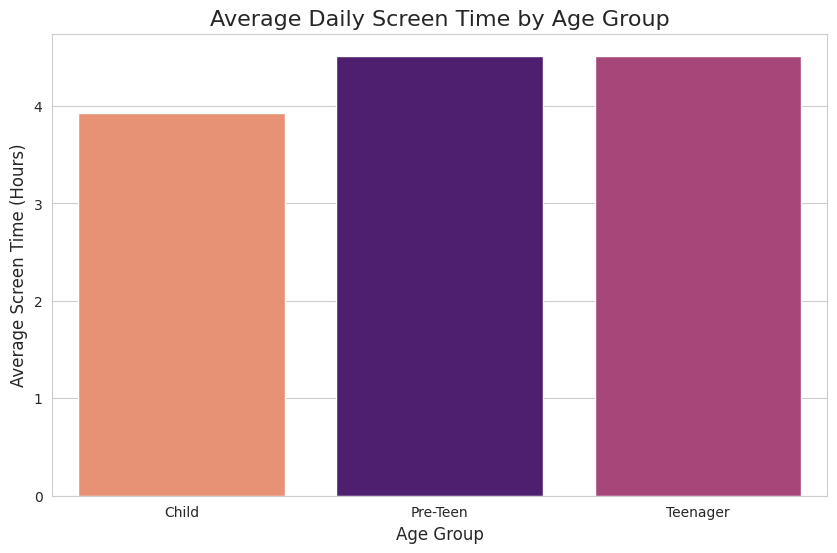

In [14]:
# Visual 2: Bar Chart for Average Screen Time by Age Band
plt.figure(figsize=(10, 6))
sns.barplot(x='Age_Band', y='Avg_Daily_Screen_Time_hr', data=df, palette='magma', order=['Child', 'Pre-Teen', 'Teenager'], errorbar=None, hue='Age_Band', legend=False)
plt.title('Average Daily Screen Time by Age Group', fontsize=16)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Average Screen Time (Hours)', fontsize=12)
plt.show()

### Insights from Visual 2 (Bar Chart: Average Daily Screen Time by Age Group)

*   The bar chart visually confirms that **average daily screen time increases with age**, with Teenagers and Pre-Teens showing higher screen times compared to Children.
*   This reinforces the earlier observation from the pivot table analysis.
*   The difference in average screen time between Pre-Teens and Teenagers appears to be less significant than the difference between Children and the older age groups.

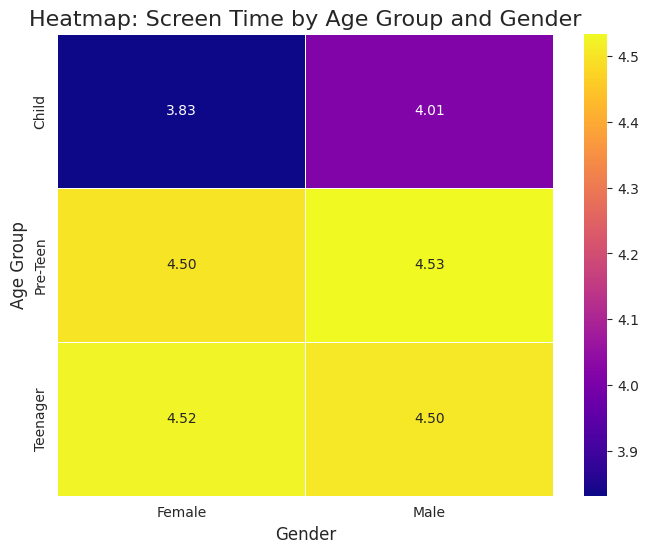

In [19]:
# Visual 3: Heatmap for Screen Time by Age Band and Gender
pivot_table_age_gender = df.pivot_table(values='Avg_Daily_Screen_Time_hr', index='Age_Band', columns='Gender', aggfunc='mean')
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_table_age_gender, annot=True, fmt=".2f", cmap="plasma", linewidths=.5)
plt.title('Heatmap: Screen Time by Age Group and Gender', fontsize=16)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Age Group', fontsize=12)
plt.show()

### Insights from Visual 3 (Heatmap: Screen Time by Age Group and Gender)

*   The heatmap provides a clear visual representation of the average screen time across different age groups and genders.
*   It reinforces the trend of increasing screen time with age for both males and females.
*   While the overall difference between genders is slight, the heatmap allows for a more granular view, showing the specific average screen time for each age group and gender combination. For instance, it shows that within the "Child" age group, males have a slightly higher average screen time than females, while in the "Teenager" group, females have a slightly higher average.

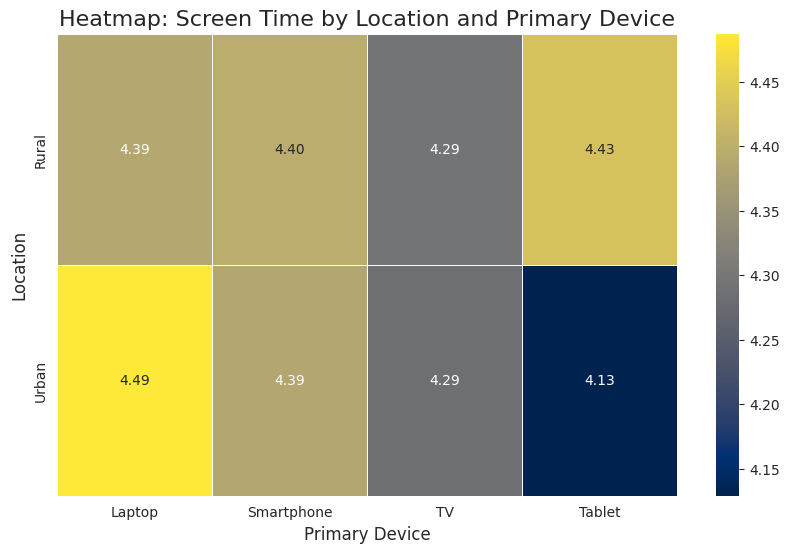

In [18]:
# Visual 4: Heatmap for Screen Time by Location and Device
pivot_table_location_device = df.pivot_table(values='Avg_Daily_Screen_Time_hr', index='Urban_or_Rural', columns='Primary_Device', aggfunc='mean')
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table_location_device, annot=True, fmt=".2f", cmap="cividis", linewidths=.5)
plt.title('Heatmap: Screen Time by Location and Primary Device', fontsize=16)
plt.xlabel('Primary Device', fontsize=12)
plt.ylabel('Location', fontsize=12)
plt.show()

### Insights from Visual 4 (Heatmap: Screen Time by Location and Primary Device)

*   The heatmap shows the average screen time broken down by both urban/rural location and the primary device used.
*   It reinforces the earlier finding that overall screen time is very similar between urban and rural areas.
*   Across both urban and rural locations, screen time averages are relatively close for Smartphones, TVs, and Laptops.
*   Tablet usage shows a slightly higher average screen time in rural areas compared to urban areas in this dataset.

# **Key Drivers of Screen Time Usage**

1. **Demographics and Environment Age:** This is a primary driver, with screen time increasing steadily from the pre-teen years into the late teens. This aligns with external studies showing that 8 to 12-year-olds average around five hours daily, which climbs to 7.5 hours for teenagers (13–18).

    **Location:** A key finding is the "urban vs. rural" difference, where urban children show slightly less screen time. This contrasts with common assumptions and suggests lifestyle differences play a role.

    **Gender:** Males generally report higher average screen time, a gap that widens with age. In the late-teen group, males exhibit both a higher median and a broader range of screen usage compared to females.

2. **Device and Content
The specific device and the content viewed are also critical drivers.**

    **Primary Device:** Smartphones are the dominant device across all age groups, with laptops being a close second. The data shows that teenagers using TVs and late-teens using portable devices have some of the highest average screen times.

3. **Health and Behavior Health Outcomes:** High screen time is clearly linked to negative health effects. Poor sleep was the most common health impact reported in the data, followed by eye strain. This is consistent with broader research linking excessive screen time to issues like anxiety and depression.

## **Final Cohort Insights**

*   **Age is a significant factor in screen time.** As children get older, their average daily screen time increases, likely driven by academic needs, social interactions, and greater access to diverse devices.
*   **Device preference is dominated by smartphones**, followed by TVs. While smartphones are the most common primary device, usage of other devices like laptops and TVs also contributes significantly to overall screen time, especially in older age groups.
*   **Gender shows only a minimal difference in average screen time.** While slight variations exist within specific age groups, the overall average screen time for males and females is very similar. This suggests that screen time habits, in terms of duration, are largely independent of gender in this cohort.
*   **Location (Urban vs. Rural) has little impact on average screen time.** The data indicates that average screen time is consistent across urban and rural areas, suggesting similar levels of device accessibility and screen time engagement in both settings within this dataset.
*   **Visualizations reinforce these findings.** The pie chart highlights smartphone dominance, the bar chart clearly shows the age-related increase in screen time, and the heatmaps provide a granular view of how age, gender, and location interact with screen time and device usage.